In [1]:
import os
import sys

root_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
model_dir = os.path.join(root_dir, "model")
sys.path.append(root_dir)
sys.path.append(model_dir)

import time
import json
import numpy as np
import pandas as pd

import hoho_utils

In [14]:
def suffix_time():
    current_time = time.time()
    local_time = time.localtime(current_time)
    time_str = time.strftime('%Y%m%d%H%M%S', local_time)
    return time_str

In [2]:
#test
hoho_utils.INDEXS_2_PIECES

'KARBNPCkarbnpc'

In [8]:
data_dir = "../output/data"
file_list = os.listdir(data_dir)
file_count = len(file_list)
item_list = list()

print(f"file_count: {file_count}")

for i, filename in enumerate(file_list):
    file_path = os.path.join(data_dir, filename)
    with open(file_path, "r") as file:
        json_str = file.read()
        matches = json.loads(json_str)
        match_count = len(matches)
        
        for j, match in enumerate(matches):
#             print(f"match: {match}")
#             break
            
            base_id =  int(time.time() * 1000) + j
            for k, round in enumerate(match):
                match_id = f"{i}-{j}"
                round_id = f"{base_id}{k}"
                state = round[0]
                action = round[2]
                next_state = round[3]
                chapture_list = round[6]
                chaptures = ','.join(chapture_list)
                chapture_reward = round[7]
                
                win = 0
                done = round[5]
                if "K" in chapture_list:
                    win = -1
                    done = True
                elif "k" in chapture_list:
                    win = 1
                    done = True
                    
                round_dict = {"match_id": match_id,
                              "round_id": round_id,
                              "state": state,
                              "action":action,
                              "next_state": next_state,
                              "done": done,
                              "chaptures": chaptures,
                              "chapture_reward": chapture_reward,
                              "win": win}
                item_list.append(round_dict)
                
                if win == 1 or win == -1:
                    break

file_count: 41


In [9]:
data = pd.DataFrame(item_list)

In [10]:
data.head(20)

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win
0,0-0,16924586527650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
1,0-0,16924586527651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
2,0-1,16924586527660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
3,0-1,16924586527661,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
4,0-2,16924586527670,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
5,0-2,16924586527671,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
6,0-3,16924586527680,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
7,0-3,16924586527681,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
8,0-4,16924586527690,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,a0a1,1NBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5...,False,N,-6.28,0
9,0-4,16924586527691,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,False,,0.00,0


In [11]:
data.dtypes

match_id            object
round_id            object
state               object
action              object
next_state          object
done                  bool
chaptures           object
chapture_reward    float64
win                  int64
dtype: object

In [12]:
data["converted"] = data["win"].apply(lambda x: 1 if x != 0 else 0)

In [13]:
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0-0,16924586527650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
1,0-0,16924586527651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
2,0-1,16924586527660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
3,0-1,16924586527661,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
4,0-2,16924586527670,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
4286,40-33,16924586542138,c1B6/4K4/9/2P1P1P1P/P8/1C7/p1p3p1r/1c7/9/rnbak...,b5b0,cCB6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,False,B,-4.92,0,0
4287,40-33,16924586542139,1Cc6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,e1e2,1Cc6/9/4K4/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,False,P,-1.00,0,0
4288,40-33,169245865421310,1Cc6/9/4K4/2P1P1P1r/P8/9/p1p3p2/1c7/9/rnbakabn1,c3c4,1Cc6/9/4K4/4P1P1r/P1P6/9/p1p3p2/1c7/9/rnbakabn1,False,P,-1.00,0,0
4289,40-33,169245865421311,1Cc6/9/4K4/4P1r2/P1P6/9/p1p3p2/1c7/9/rnbakabn1,b0b6,2c6/9/4K4/4P1r2/P1P6/9/pCp3p2/1c7/9/rnbakabn1,False,P,-1.00,0,0


### 对棋盘状态进行embedding

In [18]:
from sentence_transformers import SentenceTransformer, util

In [20]:
model = SentenceTransformer("sentence-transformers/multi-qa-mpnet-base-dot-v1")

# model_path = r"D:\temp\embeddings\multi-qa-mpnet-base-dot-v1"
# model = SentenceTransformer(model_path)

In [21]:
#test
s = "RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s_emb = model.encode(s)
s_emb.shape

(768,)

In [22]:
#test
s2 = "RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s2_emb = model.encode(s2)
util.pytorch_cos_sim(s_emb, s2_emb)

tensor([[0.9906]])

In [24]:
data["match_id"] = data["match_id"].astype(str)
data["round_id"] = data["round_id"].astype(str)

In [25]:
data["done"] = data["done"].apply(lambda x: 1 if x == True else 0)
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0-0,16924586527650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
1,0-0,16924586527651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
2,0-1,16924586527660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
3,0-1,16924586527661,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
4,0-2,16924586527670,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
4286,40-33,16924586542138,c1B6/4K4/9/2P1P1P1P/P8/1C7/p1p3p1r/1c7/9/rnbak...,b5b0,cCB6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,0,B,-4.92,0,0
4287,40-33,16924586542139,1Cc6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,e1e2,1Cc6/9/4K4/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,0,P,-1.00,0,0
4288,40-33,169245865421310,1Cc6/9/4K4/2P1P1P1r/P8/9/p1p3p2/1c7/9/rnbakabn1,c3c4,1Cc6/9/4K4/4P1P1r/P1P6/9/p1p3p2/1c7/9/rnbakabn1,0,P,-1.00,0,0
4289,40-33,169245865421311,1Cc6/9/4K4/4P1r2/P1P6/9/p1p3p2/1c7/9/rnbakabn1,b0b6,2c6/9/4K4/4P1r2/P1P6/9/pCp3p2/1c7/9/rnbakabn1,0,P,-1.00,0,0


In [26]:
data["jid"] = data["match_id"] + "_" + data["round_id"]
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0-0,16924586527650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0_16924586527650
1,0-0,16924586527651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-0_16924586527651
2,0-1,16924586527660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-1_16924586527660
3,0-1,16924586527661,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1_16924586527661
4,0-2,16924586527670,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-2_16924586527670
...,...,...,...,...,...,...,...,...,...,...,...
4286,40-33,16924586542138,c1B6/4K4/9/2P1P1P1P/P8/1C7/p1p3p1r/1c7/9/rnbak...,b5b0,cCB6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,0,B,-4.92,0,0,40-33_16924586542138
4287,40-33,16924586542139,1Cc6/4K4/9/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,e1e2,1Cc6/9/4K4/2P1P1P1P/P8/9/p1p3p1r/1c7/9/rnbakabn1,0,P,-1.00,0,0,40-33_16924586542139
4288,40-33,169245865421310,1Cc6/9/4K4/2P1P1P1r/P8/9/p1p3p2/1c7/9/rnbakabn1,c3c4,1Cc6/9/4K4/4P1P1r/P1P6/9/p1p3p2/1c7/9/rnbakabn1,0,P,-1.00,0,0,40-33_169245865421310
4289,40-33,169245865421311,1Cc6/9/4K4/4P1r2/P1P6/9/p1p3p2/1c7/9/rnbakabn1,b0b6,2c6/9/4K4/4P1r2/P1P6/9/pCp3p2/1c7/9/rnbakabn1,0,P,-1.00,0,0,40-33_169245865421311


In [27]:
data[data["jid"].duplicated()] # 怎么jid就重复了？不可能

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [7]:
# 正式环境不用，这是只是临时修正数据
# current_mid = None
# mid_list_new = []
# row = 0
# i = 0
# cls_id = 0
# done = False
# while row < len(data):
#     row_data = data.iloc[row]
#     check_mid = row_data["match_id"]
#     print(f"check_mid: {check_mid}")
    
#     count = 0
#     i = row
#     while (check_mid == current_mid or current_mid is None):
#         mid_list_new.append(f"{cls_id}-{count}")
#         print(f"  current_mid: {current_mid}")
#         count = count + 1
        
#         i = i + 1
#         if i >= len(data):
#             done = True
#             break
        
#         current_mid = data.iloc[i]["match_id"]
        
    
#     if done:
#         break
        
#     cls_id = cls_id + 1
#     row = row + count
#     current_mid = None
        

check_mid: 0
  current_mid: None
  current_mid: 0
check_mid: 1
  current_mid: None
  current_mid: 1
check_mid: 2
  current_mid: None
  current_mid: 2
check_mid: 3
  current_mid: None
  current_mid: 3
check_mid: 4
  current_mid: None
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
check_mid: 5
  current_mid: None
  current_mid: 5
check_mid: 6
  current_mid: None
  current_mid: 6
check_mid: 7
  current_mid: None
  current_mid: 7
check_mid: 8
  current_mid: None
  current_mid: 8
check_mid: 9
  current_mid: None
  current_mid: 9
check_mid: 10
  current_mid: None
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
check_mid: 11
  current_mid: None
  current_mid: 11
check_mid: 12
  current_mid: None
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current

In [8]:
# 正式环境不用，这是只是临时修正数据
# len(mid_list_new)

2533

In [9]:
# 正式环境不用，这是只是临时修正数据
# data["mid_new"] = mid_list_new
# data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,mid_new
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0_16922826810,0-0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0_16922826811,0-1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1_16922826810,1-0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1_16922826811,1-1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2_16922826810,2-0
...,...,...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,584_16922826824,726-4
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826825,726-5
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826826,726-6
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,NaN,0.00,0,0,584_16922826827,726-7


In [10]:
# 正式环境不用，这是只是临时修正数据
# data["jid_new"] = data["mid_new"] + "_" + data["round_id"]

In [11]:
# 正式环境不用，这是只是临时修正数据
# data[data["jid_new"].duplicated()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,mid_new,jid_new


In [12]:
# data.to_excel(f"./hoho_chess_temp.xlsx", index = False)

In [7]:
# 正式环境不用，这是只是临时修正数据
# data = pd.read_excel(f"./hoho_chess_temp.xlsx")
# data1 = data.drop(["match_id", "round_id", "jid"], axis = 1, inplace = False)

In [8]:
# data1.dtypes

state               object
action              object
next_state          object
done                 int64
chaptures           object
chapture_reward    float64
win                  int64
converted            int64
mid_new             object
jid_new             object
dtype: object

In [10]:
# 正式环境不用，这是只是临时修正数据
# data1.groupby("jid_new")["mid_new"].count().reset_index(name = "count")

,jid_new,count
0,0-0_16922826810,1
1,0-1_16922826811,1
2,1-0_16922826810,1
3,1-1_16922826811,1
4,10-0_16922826810,1
...,...,...
2528,98-6_16922826816,1
2529,98-7_16922826817,1
2530,98-8_16922826818,1
2531,99-0_16922826810,1


In [28]:
data[data["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [29]:
data2 = data.fillna("", inplace = False)

In [30]:
data2[data2["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [43]:
data2.to_excel(f"hoho_chess_data_{suffix_time()}.xlsx", index = False)

In [44]:
data2_demo = pd.read_excel("hoho_chess_data_20230819234012.xlsx")
data2_demo.head()

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0-0,16924586527650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0_16924586527650
1,0-0,16924586527651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-0_16924586527651
2,0-1,16924586527660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-1_16924586527660
3,0-1,16924586527661,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1_16924586527661
4,0-2,16924586527670,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-2_16924586527670


In [46]:
data2_demo[data2_demo["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
9,0-4,16924586527691,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,0,NaN,0.0,0,0,0-4_16924586527691
10,0-4,16924586527692,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/6nc...,e3e4,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/6nc...,0,NaN,0.0,0,0,0-4_16924586527692
11,0-4,16924586527693,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/2n3...,h2h4,1cBAKABNR/R8/9/P1P3P1P/1C2P2C1/9/p1p1p1p1p/2n3...,0,NaN,0.0,0,0,0-4_16924586527693
13,0-4,16924586527695,1cBAKABNR/R8/9/P1P3P1P/4P2C1/9/prp1p1p1p/2n3nc...,h4f4,1cBAKABNR/R8/9/P1P3P1P/4PC3/9/prp1p1p1p/2n3nc1...,0,NaN,0.0,0,0,0-4_16924586527695
14,0-4,16924586527696,1cBAKABNR/R8/9/P1P3P1P/4PC3/9/prp1p1p1p/2n3nc1...,i3i4,1cBAKABNR/R8/9/P1P3P2/4PC2P/9/prp1p1p1p/2n3nc1...,0,NaN,0.0,0,0,0-4_16924586527696
...,...,...,...,...,...,...,...,...,...,...,...
4265,40-29,16924586542091,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,0,NaN,0.0,0,0,40-29_16924586542091
4266,40-29,16924586542092,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/6nc...,e3e4,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/6nc...,0,NaN,0.0,0,0,40-29_16924586542092
4267,40-29,16924586542093,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/2n3...,h2h4,1cBAKABNR/R8/9/P1P3P1P/1C2P2C1/9/p1p1p1p1p/2n3...,0,NaN,0.0,0,0,40-29_16924586542093
4269,40-29,16924586542095,1cBAKABNR/R8/9/P1P3P1P/4P2C1/9/prp1p1p1p/2n3nc...,h4f4,1cBAKABNR/R8/9/P1P3P1P/4PC3/9/prp1p1p1p/2n3nc1...,0,NaN,0.0,0,0,40-29_16924586542095


In [47]:
data2_demo.fillna("", inplace = True)
data2_demo[data2_demo["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [48]:
data_matchid_group = data2.groupby("match_id")["jid"].count().reset_index(name = "count")
data_matchid_group

,match_id,count
0,0-0,2
1,0-1,2
2,0-10,8
3,0-11,2
4,0-12,11
...,...,...
1232,9-5,4
1233,9-6,2
1234,9-7,2
1235,9-8,2


In [49]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

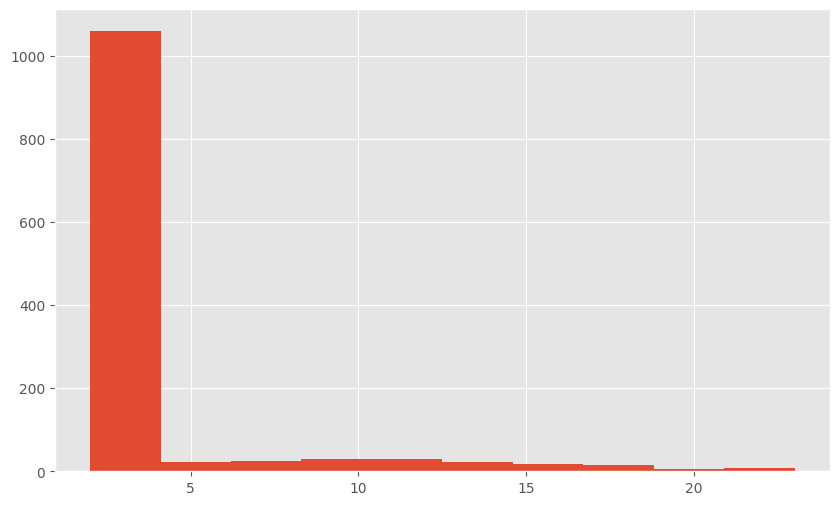

In [50]:
plt.figure(figsize = (10, 6))
plt.hist(data_matchid_group["count"].values)
plt.show()

In [51]:
data_matchid_group["count"].values

array([2, 2, 8, ..., 2, 2, 5], dtype=int64)

In [52]:
def encode_pieces_one_hot(pieces):
    result = np.zeros(len(hoho_utils.INDEXS_2_PIECES))
    for p in pieces:
        try:
            index = hoho_utils.PIECES_2_INDEX[p]
            result[index] = 1
        except KeyError as e:
            pass
#             print(f"error: 找不到key! {e}")
        
    return result


# test
# encode_pieces_one_hot(["N",'K'])
encode_pieces_one_hot([""])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
def encode_board_state(board_state, model):
    return model.encode(board_state)


# test
encode_board_state(s, model)

array([-8.08944274e-03, -3.75740319e-01, -3.93722624e-01,  3.54986265e-02,
       -9.69870239e-02, -1.52960584e-01,  1.33453503e-01,  3.19957435e-01,
       -6.09017462e-02,  1.48095578e-01,  4.13848013e-02,  2.15794921e-01,
        1.60120174e-01,  1.26345474e-02, -2.20053885e-02, -2.27970257e-02,
       -1.01004774e-02,  2.58477449e-01,  6.86706230e-02, -1.43871740e-01,
       -2.28361204e-01,  3.13995779e-01, -8.89725611e-03,  8.84493720e-03,
       -3.00548524e-02,  1.23455487e-01,  1.79964259e-01,  8.72971267e-02,
       -1.92379117e-01,  3.27123441e-02,  5.30850654e-03,  1.61565170e-01,
       -3.71093720e-01,  1.01709105e-01, -9.45823485e-05, -1.11263424e-01,
        9.73065570e-02, -2.70264577e-02, -2.76365787e-01,  3.01052988e-01,
       -1.26016498e-01,  1.34677723e-01, -3.35976601e-01, -2.35981062e-01,
       -1.71674445e-01,  1.04352487e-02,  1.20771065e-01,  1.35088116e-01,
        3.35097879e-01, -7.61204225e-04,  4.42475855e-01, -4.28180061e-02,
       -2.63679717e-02, -

In [54]:
def encode_action_one_hot(all_actions, action = None):
    result= np.zeros(len(all_actions))
    try:
        index = all_actions.index(action)
        result[index] = 1

    except ValueError as e:
        pass
#         print(f"error: 找不到action:{e}")
        
    return result
        

# test
all_actions = hoho_utils.get_all_actions()
encode_action_one_hot(all_actions, "b4d4")
# encode_action_one_hot(all_actions, "")

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
def state_encoding(s):
    return encode_board_state(s, model)

def action_encoding(a):
    return encode_action_one_hot(all_actions, a)

def chapturs_encoding(c):
    c_list = c.split(",")
    return encode_pieces_one_hot(c_list)

In [56]:
def features_for_logistic_regression(df):    
    n, m = df.shape

    states = df["state"].apply(state_encoding).values.tolist()
    actions = df["action"].apply(action_encoding).values.tolist()
    chaptures = df["chaptures"].apply(chapturs_encoding).values.tolist()
    c_rewards = df["chapture_reward"].values.reshape((n, -1))
    wins = df["win"].values.reshape((n, -1))
    dones = df["done"].values.reshape((n, -1))
    
    return np.hstack([states, actions, chaptures, c_rewards, wins, dones]), df["converted"].values


# test
X_demo,y_demo = features_for_logistic_regression(data2.sample(5))
X_demo.shape, y_demo.shape

((5, 2871), (5,))

In [57]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 6666

In [58]:
X, y = features_for_logistic_regression(data2)

In [59]:
X.shape, y.shape

((4291, 2871), (4291,))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = RANDOM_SEED)

In [61]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_val, y_val)
print(score)

1.0


In [62]:
# 输出模型权重（系数）
coefficients = logisticRegr.coef_
intercept = logisticRegr.intercept_

print("Coefficients:", coefficients[0])
print("Intercept:", intercept)

Coefficients: [ 0.02069774  0.02584764 -0.00424163 ...  0.02291279 -3.42374277
  3.42374277]
Intercept: [-6.41158832]


In [35]:
# demo
import pandas as pd
import numpy as np

# 创建一个示例的DataFrame，假设你已经有了这个数据
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'feature2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
    'match': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
}

df = pd.DataFrame(data)
df


,feature1,feature2,match
0,1,0.1,A
1,2,0.2,A
2,3,0.3,A
3,4,0.4,A
4,5,0.5,A
5,6,0.6,B
6,7,0.7,B
7,8,0.8,B
8,9,0.9,B
9,10,1.0,B


In [52]:
# 根据'match'列的值进行分组
grouped = df.groupby('match')

# 定义一个函数来处理每个分组
def process_group(group):
    # 获取分组中的样本数量
    group_size = len(group)
    
    # 如果样本数量超过15个，裁剪多余的样本
    if group_size > 6:
#         group = group.sample(n=15, random_state=42)
        group = group.head(6)
    
    # 如果样本数量不足15个，使用0填充剩余的部分
    elif group_size < 6:
        num_to_add = 6 - group_size
        to_add = pd.DataFrame({'feature1': [0] * num_to_add, 'feature2': [0.0] * num_to_add, 'match': [group['match'].iloc[0]] * num_to_add})
        group = pd.concat([group, to_add], ignore_index=True)
    
    return group

# 对每个分组应用处理函数，并重新组合回一个新的DataFrame
processed_groups = grouped.apply(process_group)

# 重新排序并重置索引
processed_data = processed_groups.reset_index(drop=True)

processed_data

,feature1,feature2,match
0,1,0.1,A
1,2,0.2,A
2,3,0.3,A
3,4,0.4,A
4,5,0.5,A
5,0,0.0,A
6,6,0.6,B
7,7,0.7,B
8,8,0.8,B
9,9,0.9,B


In [79]:
def features_for_lstm(df, max_step = 15):  
    
    # 定义一个函数来处理每个分组
    def process_group(group, max_group_size, num_features):
        # 获取分组中的样本数量
        group_size = len(group)
        
#         print(group_size, max_group_size, num_features)

        # 如果样本数量超过max_group_size个，裁剪多余的样本
        if group_size > max_group_size:
            group = group.head(max_group_size)

        # 如果样本数量不足max_group_size个，使用0填充剩余的部分
        elif group_size < max_group_size:
            num_to_add = max_group_size - group_size
            added_features = np.zeros((num_to_add, num_features)).tolist()
            to_add = pd.DataFrame({'features': added_features, 
                                   'match_id': [group['match_id'].iloc[0]] * num_to_add, 
                                   "converted": [0] * num_to_add})
            group = pd.concat([group, to_add], ignore_index = True)

        return group
    
    n, m = df.shape
    
    df_ext = df.copy()

    states = df_ext["state"].apply(state_encoding).values.tolist()
    actions = df_ext["action"].apply(action_encoding).values.tolist()
    chaptures = df_ext["chaptures"].apply(chapturs_encoding).values.tolist()
    c_rewards = df_ext["chapture_reward"].values.reshape((n, -1))
    wins = df_ext["win"].values.reshape((n, -1))
    dones = df_ext["done"].values.reshape((n, -1))
    
    # hoho_todo: 根据round_id升序排序
    
    features = np.hstack([states, actions, chaptures, c_rewards, wins, dones])
    _, f_m = features.shape
#     print(features.shape)
#     print(features)
    
    df_ext["features"] = features.tolist()   # 这里要转为list才能正常赋值

    group = df_ext.groupby("match_id")
    process_group = group.apply(lambda group: process_group(group, max_step, f_m))
    process_data = process_group.reset_index(drop = True)
    
    return np.array(process_data["features"].values.tolist()), np.array(process_data["converted"].values.tolist())
    
    
    
#     return np.hstack([states, actions, chaptures, c_rewards, wins, dones]), df["converted"].values


# test
X_demo, y_demo = features_for_lstm(data2.head(2))
X_demo.shape, y_demo.shape

((15, 2871), (15,))